In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import os
import cv2
import glob
import numpy as np
import json

In [22]:
# define colors
PALETTE = [
    (220, 20, 60), (119, 11, 32), (0, 0, 142), (0, 0, 230), (106, 0, 228),
    (0, 60, 100), (0, 80, 100), (0, 0, 70), (0, 0, 192), (250, 170, 30),
    (100, 170, 30), (220, 220, 0), (175, 116, 175), (250, 0, 30), (165, 42, 42),
    (255, 77, 255), (0, 226, 252), (182, 182, 255), (0, 82, 0), (120, 166, 157),
    (110, 76, 0), (174, 57, 255), (199, 100, 0), (72, 0, 118), (255, 179, 240),
    (0, 125, 92), (209, 0, 151), (188, 208, 182), (0, 220, 176),
]

# convert to normalized RGB value
PALETTE1 = [(r/255, g/255, b/255) for r, g, b in PALETTE]

In [14]:
# set the path
IMAGE_ROOT = "../data/train/DCM"

pngs = [
    os.path.relpath(os.path.join(root, fname), start=IMAGE_ROOT)
    for root, _dirs, files in os.walk(IMAGE_ROOT)
    for fname in files
    if os.path.splitext(fname)[1].lower() == ".png"
]

In [17]:
# input the image name to check
imgname = 'ID277/image1664155070330.png'
idx = pngs.index(imgname)

In [18]:
# open image & json
image = cv2.imread('../data/train/DCM/{}'.format(imgname))

with open('../data/train/outputs_json/{}.json'.format(imgname.replace('.png', '')), 'r', encoding='utf-8') as f:
	train_json = json.load(f)
 
train_json1 = train_json['annotations']

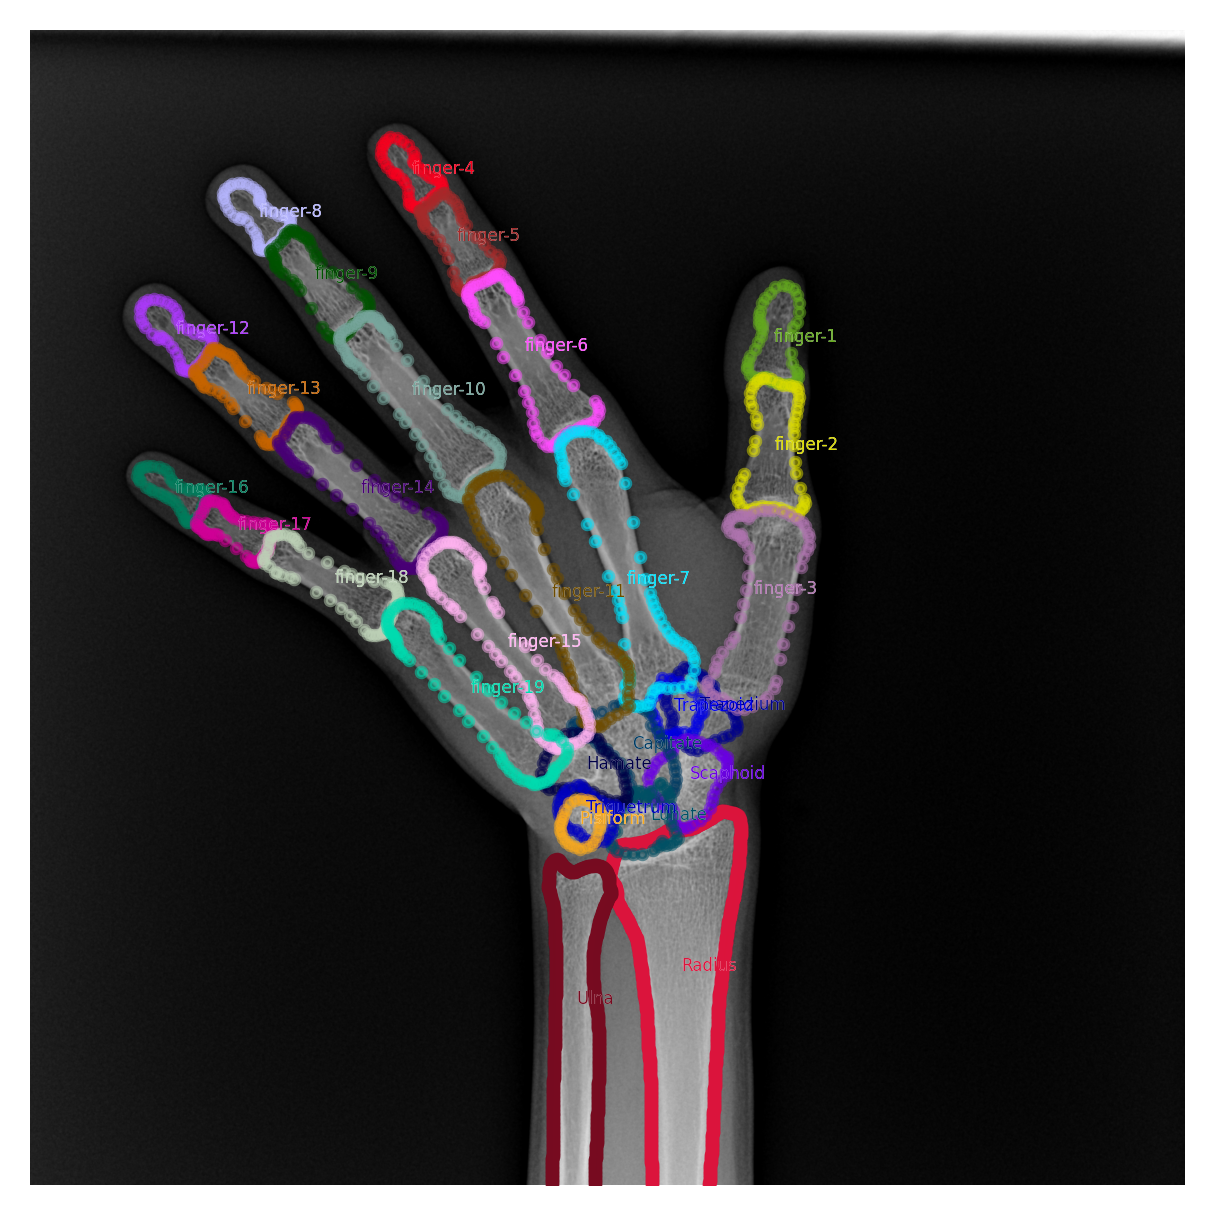

In [25]:
# visualize
plt.figure(dpi=300, figsize=(5,5))
plt.imshow(image)
plt.axis('off')

for ind, i in enumerate(train_json1):
    c = i['points']
    xc = [x[0] for x in c]
    yc = [x[1] for x in c]
    center = [np.mean(xc), np.mean(yc)]
    plt.scatter(xc, yc, color=PALETTE1[ind], s=5, alpha=0.5)
    plt.text(center[0], center[1], i['label'], color=PALETTE1[ind], fontsize=4, zorder=7)
    plt.text(center[0], center[1], i['label'], color='white', fontsize=4, zorder=5)
    
plt.show()
#plt.savefig()   # if you want to save